In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
%matplotlib inline

#Preprocess
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the analytics csv file and merge all the dataset into a dataframe called "df"
a = pd.read_csv('D:\Masters Data\Data MINING\Project\datasetproject1\DatasetProject1/Train_HR_Employee_Attrition.csv')
b = pd.read_csv('D:\Masters Data\Data MINING\Project\datasetproject1\DatasetProject1/Test_HR_Employee_Attrition.csv')
df = pd.concat([a,b])
df1=df.copy()

# 1.1 Data Semantics

In [4]:
df.shape

(1470, 33)

In [9]:
df1['Age']= df1['Age'].fillna(df1['Age'].groupby([df['JobLevel'], df['Age']]).median()[1])

In [10]:
df1['Age'].isnull().sum()

0

In [11]:
# Check data integrity, whether we have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 293
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1258 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1339 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1395 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatisf

In [12]:
# Find unique values of categorical attributes
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print("====================================")

DistanceFromHome : [ 9  1 16  5  7  4  8  3  2 17 29 26 12 10 18 11 22 23  6 25 15 24 28 20
 27 13 19 21 14]
Education : [4 1 3 2 5]
EnvironmentSatisfaction : [2 3 4 1]
JobInvolvement : [3 4 1 2]
JobLevel : [3 5 2 1 4]
JobSatisfaction : [3 4 2 1]
NumCompaniesWorked : [9 1 2 0 3 8 7 4 5 6]
PercentSalaryHike : [17 14 25 12 11 18 20 13 21 15 19 22 16 24 23]
PerformanceRating : [ 3. nan  4.]
RelationshipSatisfaction : [3 2 4 1]
StandardHours : [80. nan]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [ 2.  3.  4.  1. nan  0.  5.  6.]
WorkLifeBalance : [2 3 1 4]
YearsInCurrentRole : [ 7  8  5  2  3  0  9 10 12  1  4  6 13 15 17 16 14 11 18]
YearsSinceLastPromotion : [ 2  1  0  9 14  7  5  4  6  3 11 12 13 15  8 10]
YearsWithCurrManager : [13  6  2  7  1  3  9  4  0 15 10  8 11 12  5 14 17 16]


In [13]:
# Check for duplicates
dup=df1.drop_duplicates()
dup.shape

(1470, 33)

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1


In [15]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,18.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,18.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1


In [16]:
#Find the range of HourlyRate
c=df['MonthlyIncome'].unique()
c.sort(axis=0)
c

array([ 1009.,  1081.,  1091., ..., 19943., 19999.,    nan])

In [17]:
#Find the range of HourlyRate
c=df1['MonthlyIncome'].unique()
c.sort(axis=0)
c

array([ 1009.,  1081.,  1091., ..., 19943., 19999.,    nan])

In [18]:
print("Distinct values in Business Travel: \t " , df['BusinessTravel'].unique())

Distinct values in Business Travel: 	  ['Travel_Rarely' 'Travel_Frequently' nan 'Non-Travel']


In [19]:
#Statistical properties only for numerical attributes
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1258.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1190.000000,...,1470.000000,753.0,1470.000000,1470.000000,1178.000000,1470.000000,1396.000000,1470.000000,1470.000000,1470.000000
mean,37.115262,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6548.915966,...,2.712245,80.0,0.793878,11.279592,2.810696,2.761224,6.942693,4.229252,2.187755,4.123129
std,9.068654,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4732.775331,...,1.081209,0.0,0.852077,7.780782,1.302499,0.706476,6.033444,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2973.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4907.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8437.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
#Statistical properties only for numerical attributes
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1190.000000,...,1470.000000,753.0,1470.000000,1470.000000,1178.000000,1470.000000,1396.000000,1470.000000,1470.000000,1470.000000
mean,34.358503,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6548.915966,...,2.712245,80.0,0.793878,11.279592,2.810696,2.761224,6.942693,4.229252,2.187755,4.123129
std,10.747047,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4732.775331,...,1.081209,0.0,0.852077,7.780782,1.302499,0.706476,6.033444,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2973.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,34.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4907.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8437.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
# Include only string columns in thge description
df.describe(include=[object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1339,1470,1470,1395,1470,1470,1002,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,947,961,606,841,326,673,1002,1054


# 1.2 Distribution of the variables and statistics# 

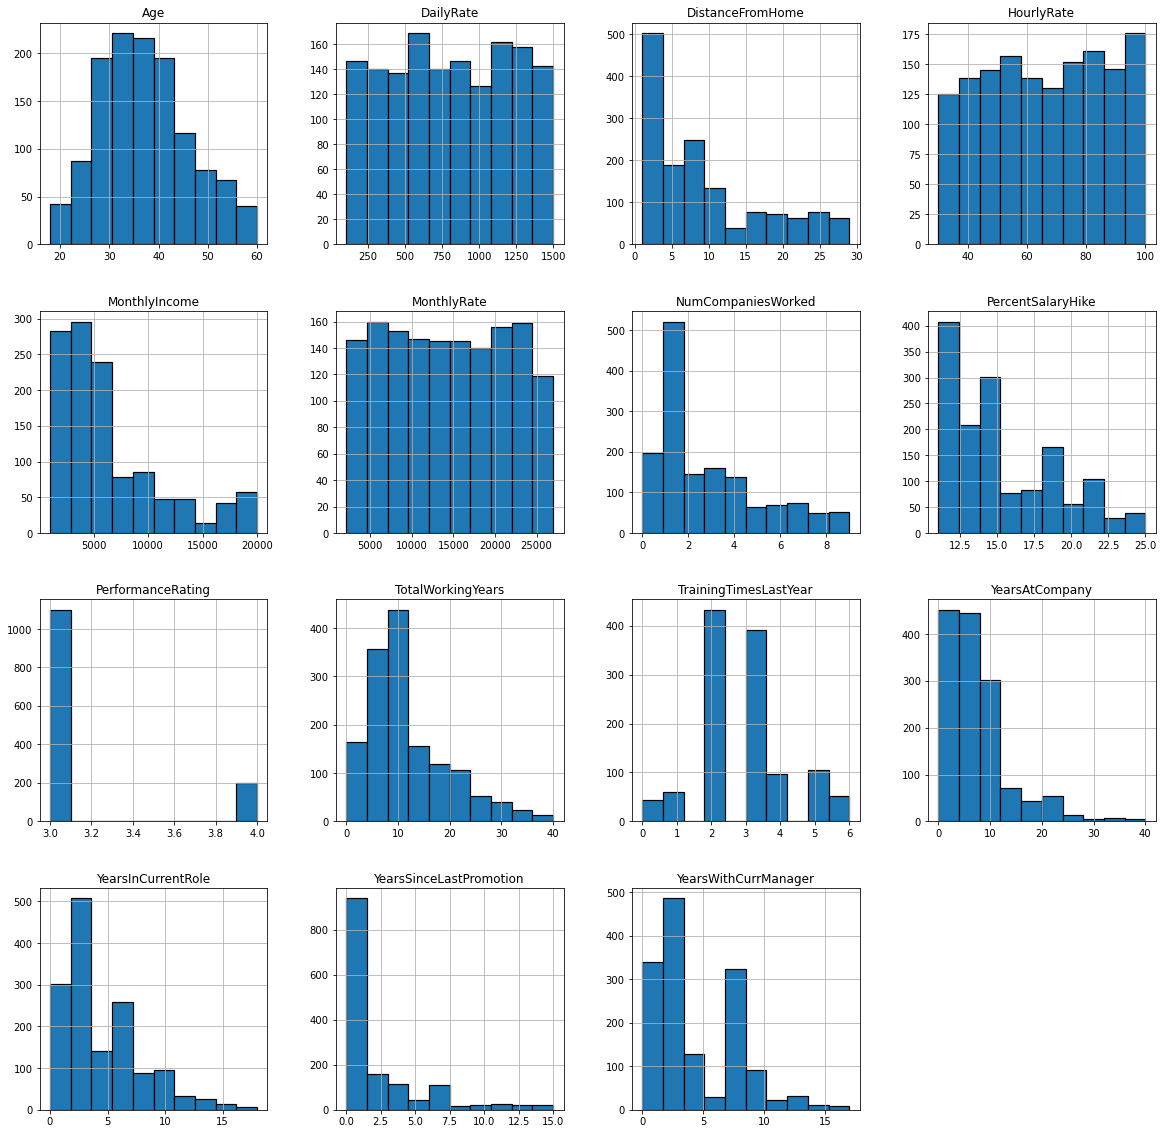

In [22]:
# Visulazing the distibution of numerical data using histograms
df.hist(edgecolor='black', column= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                                    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
                                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                                    'YearsInCurrentRole' , 'YearsSinceLastPromotion' , 'YearsWithCurrManager' ],
        linewidth=1.2, figsize=(20, 20));

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

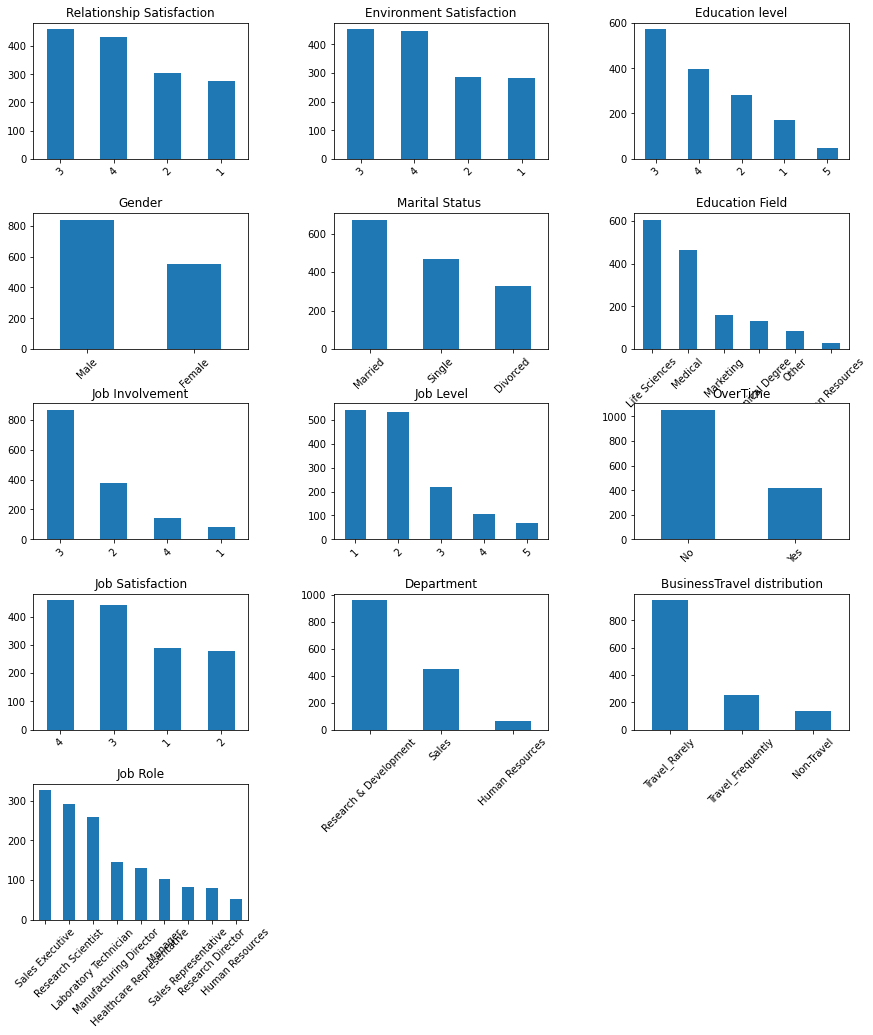

In [23]:
# Set up a grid of plots
fig = plt.figure(figsize=(20,20))
fig_dims = (6,4)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plot Business Travel
plt.subplot2grid(fig_dims, (3,2))
df['BusinessTravel'].value_counts().plot(kind='bar', title='BusinessTravel distribution')
plt.xticks(rotation=45)

#Plot Department 
plt.subplot2grid(fig_dims, (3,1))
df['Department'].value_counts().plot(kind='bar', title='Department')
plt.xticks(rotation=45)

#Plot Education Level 
plt.subplot2grid(fig_dims, (0,2))
df['Education'].value_counts().plot(kind='bar', title='Education level')
plt.xticks(rotation=45)

#Plot Education Field
plt.subplot2grid(fig_dims, (1,2))
df['EducationField'].value_counts().plot(kind='bar', title='Education Field')
plt.xticks(rotation=45)

#Plot Environment Satisfaction
plt.subplot2grid(fig_dims, (0,1))
df['EnvironmentSatisfaction'].value_counts().plot(kind='bar', title='Environment Satisfaction')
plt.xticks(rotation=45)

#Plot Gender
plt.subplot2grid(fig_dims, (1,0))
df['Gender'].value_counts().plot(kind='bar', title='Gender')
plt.xticks(rotation=45)

#Plot Job Involvement
plt.subplot2grid(fig_dims, (2,0))
df['JobInvolvement'].value_counts().plot(kind='bar', title='Job Involvement')
plt.xticks(rotation=45)

#Plot Job Level
plt.subplot2grid(fig_dims, (2,1))
df['JobLevel'].value_counts().plot(kind='bar', title='Job Level')
plt.xticks(rotation=45)
   
#Plot Job Role
plt.subplot2grid(fig_dims, (4,0))
df['JobRole'].value_counts().plot(kind='bar', title='Job Role')
plt.xticks(rotation=45)
   
#Plot Job Satisfaction
plt.subplot2grid(fig_dims, (3,0))
df['JobSatisfaction'].value_counts().plot(kind='bar', title='Job Satisfaction')
plt.xticks(rotation=45)
   
#Plot Marital Status 
plt.subplot2grid(fig_dims, (1,1))
df['MaritalStatus'].value_counts().plot(kind='bar', title='Marital Status ')
plt.xticks(rotation=45)

#Plot Realtionship satisfaction 
plt.subplot2grid(fig_dims, (0,0))
df['RelationshipSatisfaction'].value_counts().plot(kind='bar', title='Relationship Satisfaction')
plt.xticks(rotation=45)

#Plot Over Time
plt.subplot2grid(fig_dims, (2,2))
df['OverTime'].value_counts().plot(kind='bar', title='OverTime')
plt.xticks(rotation=45)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


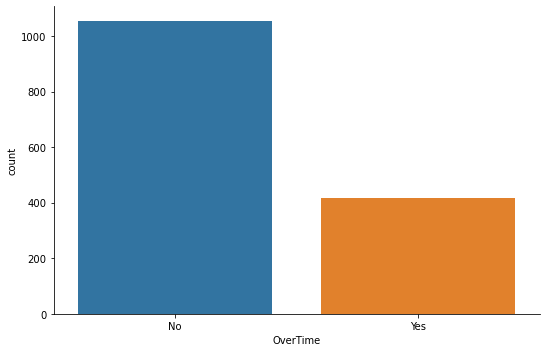

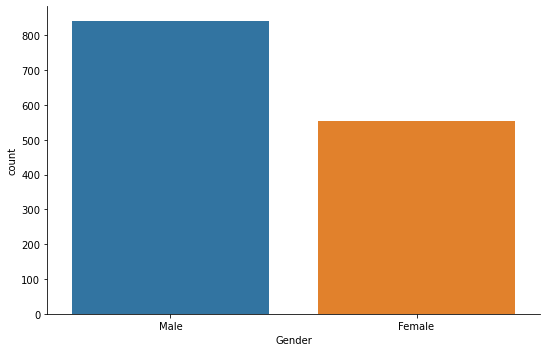

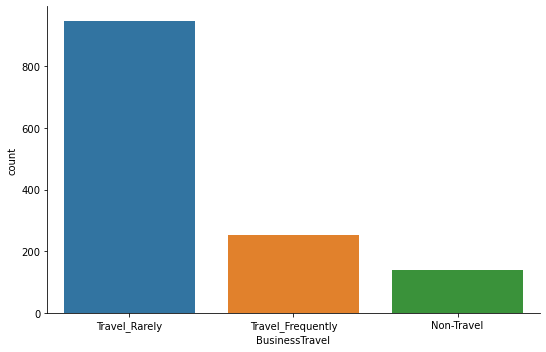

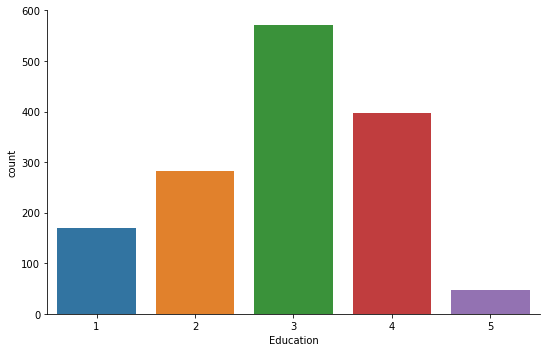

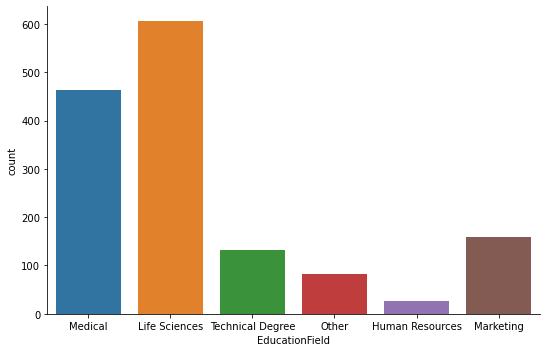

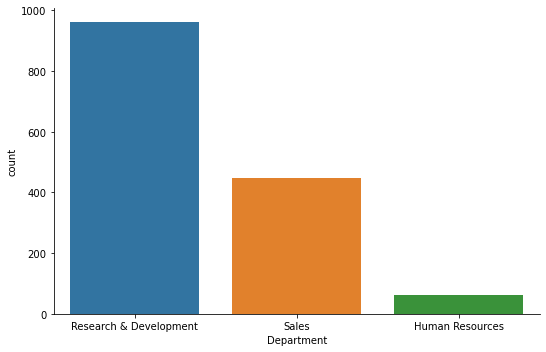

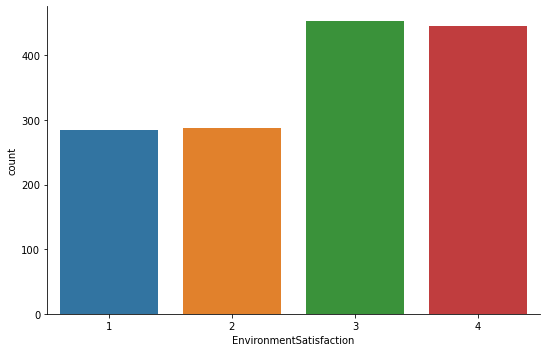

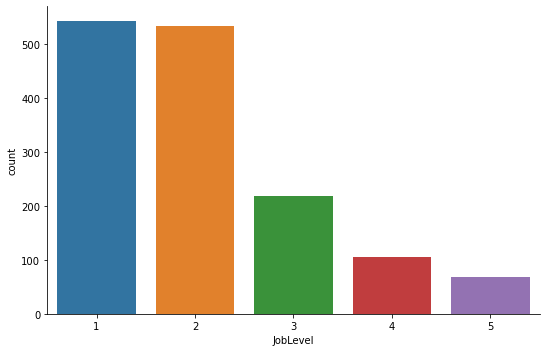

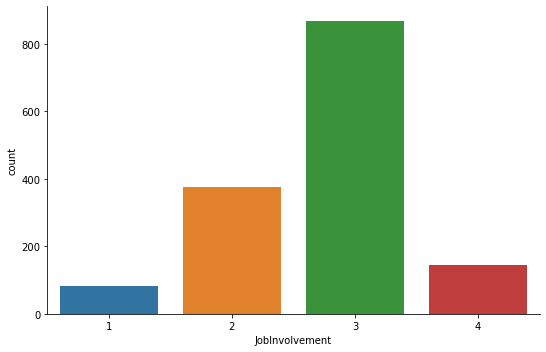

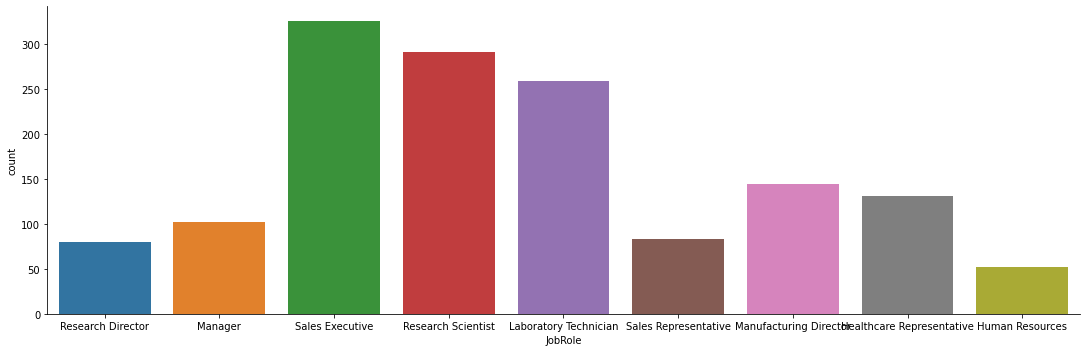

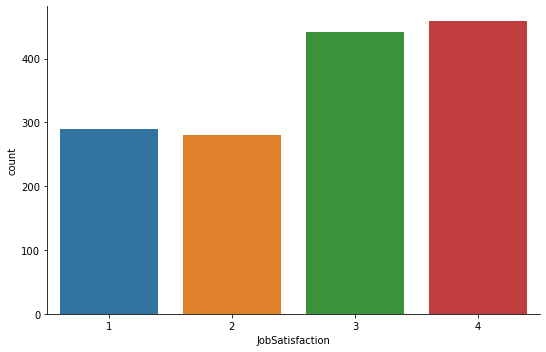

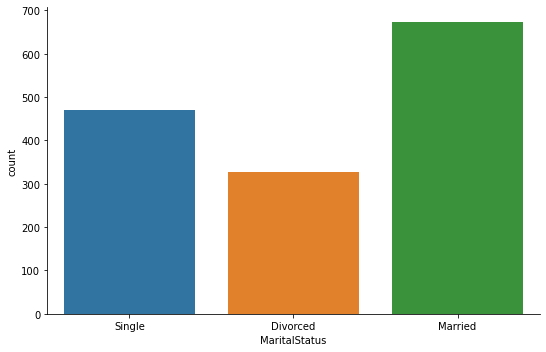

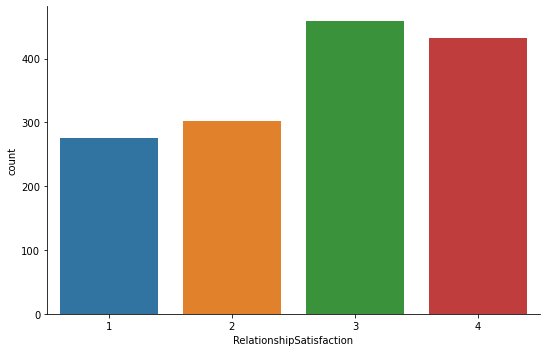

In [24]:
cols=['OverTime', 'Gender', 'BusinessTravel', 'Education', 'EducationField', 'Department',
      'EnvironmentSatisfaction', 'JobLevel','JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 
      'RelationshipSatisfaction']

# Function for plotting the categorical features
def plot_categorical(attr,labels=None):
    if(attr=='JobRole'):
        sb.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sb.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

for i in cols:
    plot_categorical(i)

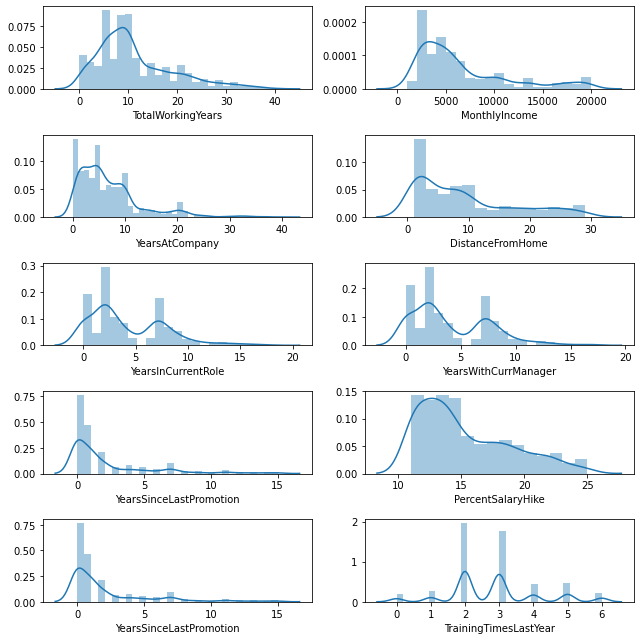

In [25]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sb.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sb.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sb.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sb.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sb.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sb.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sb.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sb.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sb.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sb.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

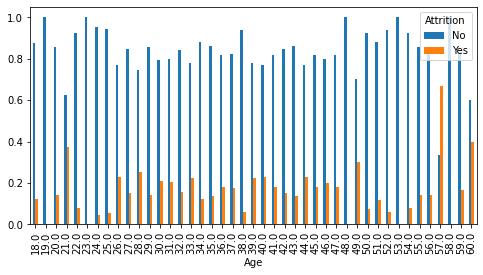

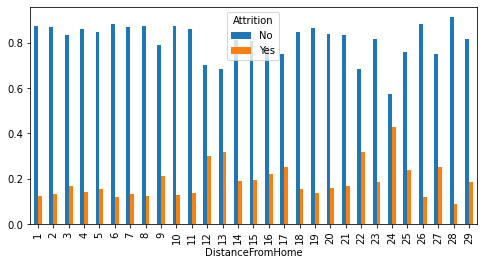

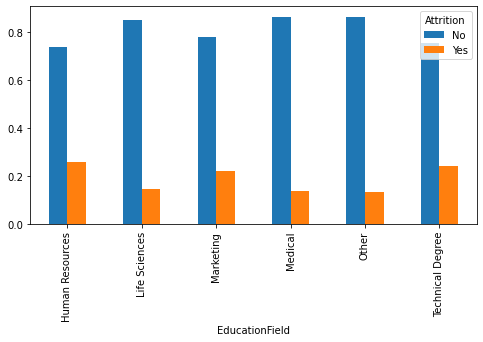

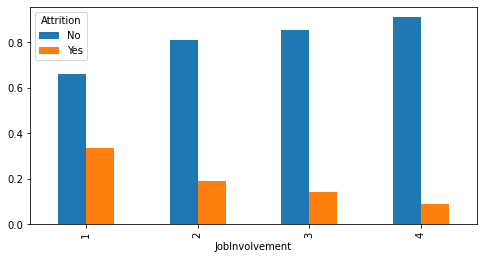

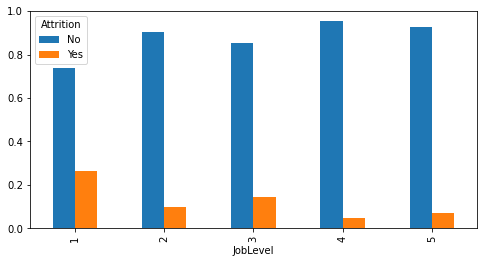

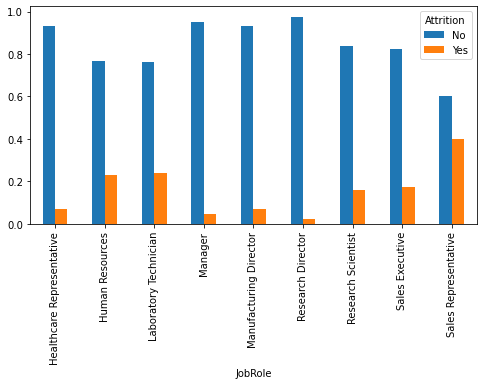

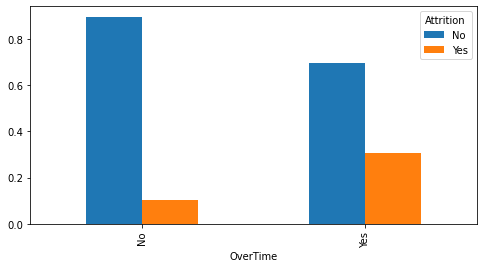

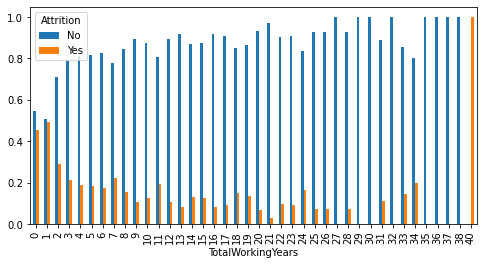

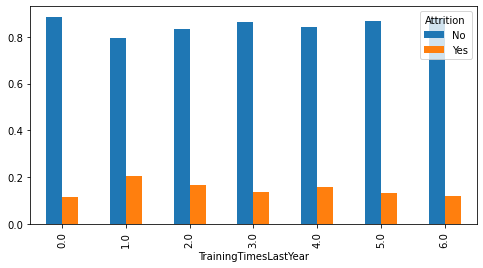

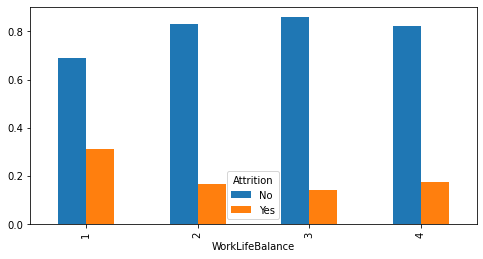

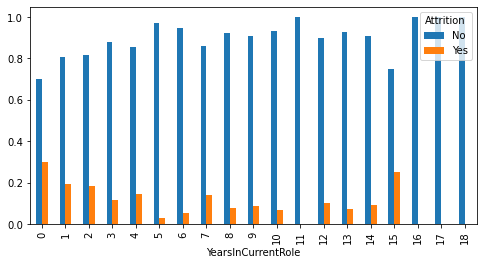

In [26]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)
    
for col in BarPlot_columns:
    Bar_plots(col)

In [27]:
# Crosstable of Gender and Attrition
gender_xt = pd.crosstab(df['Gender'], df['Attrition'])
gender_xt

Attrition,No,Yes
Gender,,
Female,465,89
Male,707,134


In [28]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
df1["Attrition_numerical"] = df1["Attrition"].apply(lambda x: target_map[x])

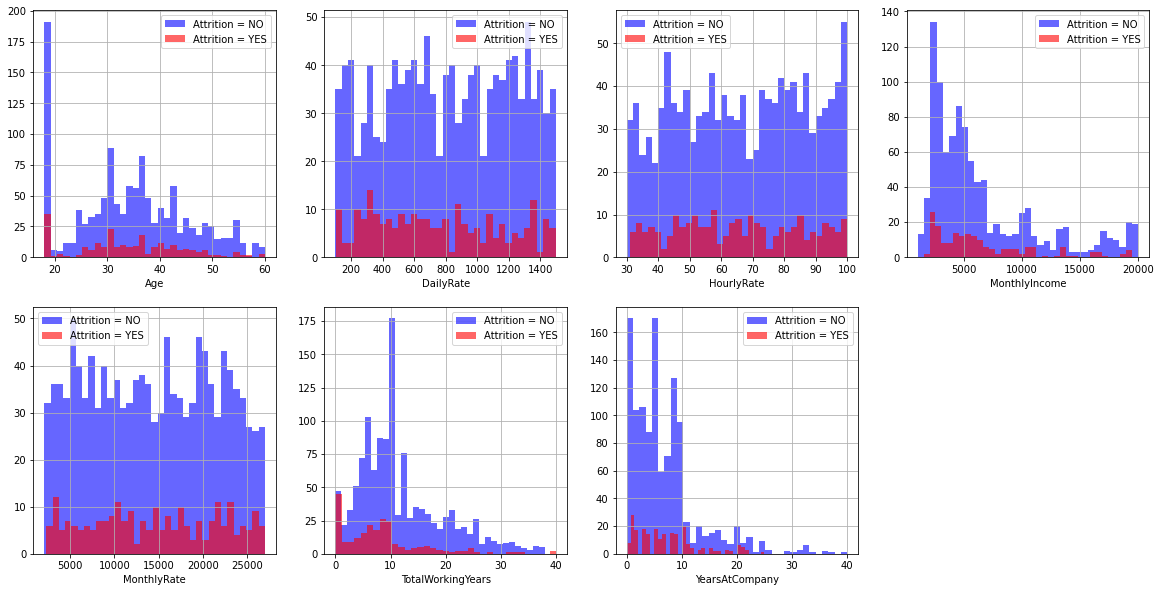

In [29]:
cont_col = []
for column in df1.columns:
    if df1[column].dtypes != object and df1[column].nunique() > 30:
        cont_col.append(column)
        
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df1[df1["Attrition_numerical"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df1[df1["Attrition_numerical"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

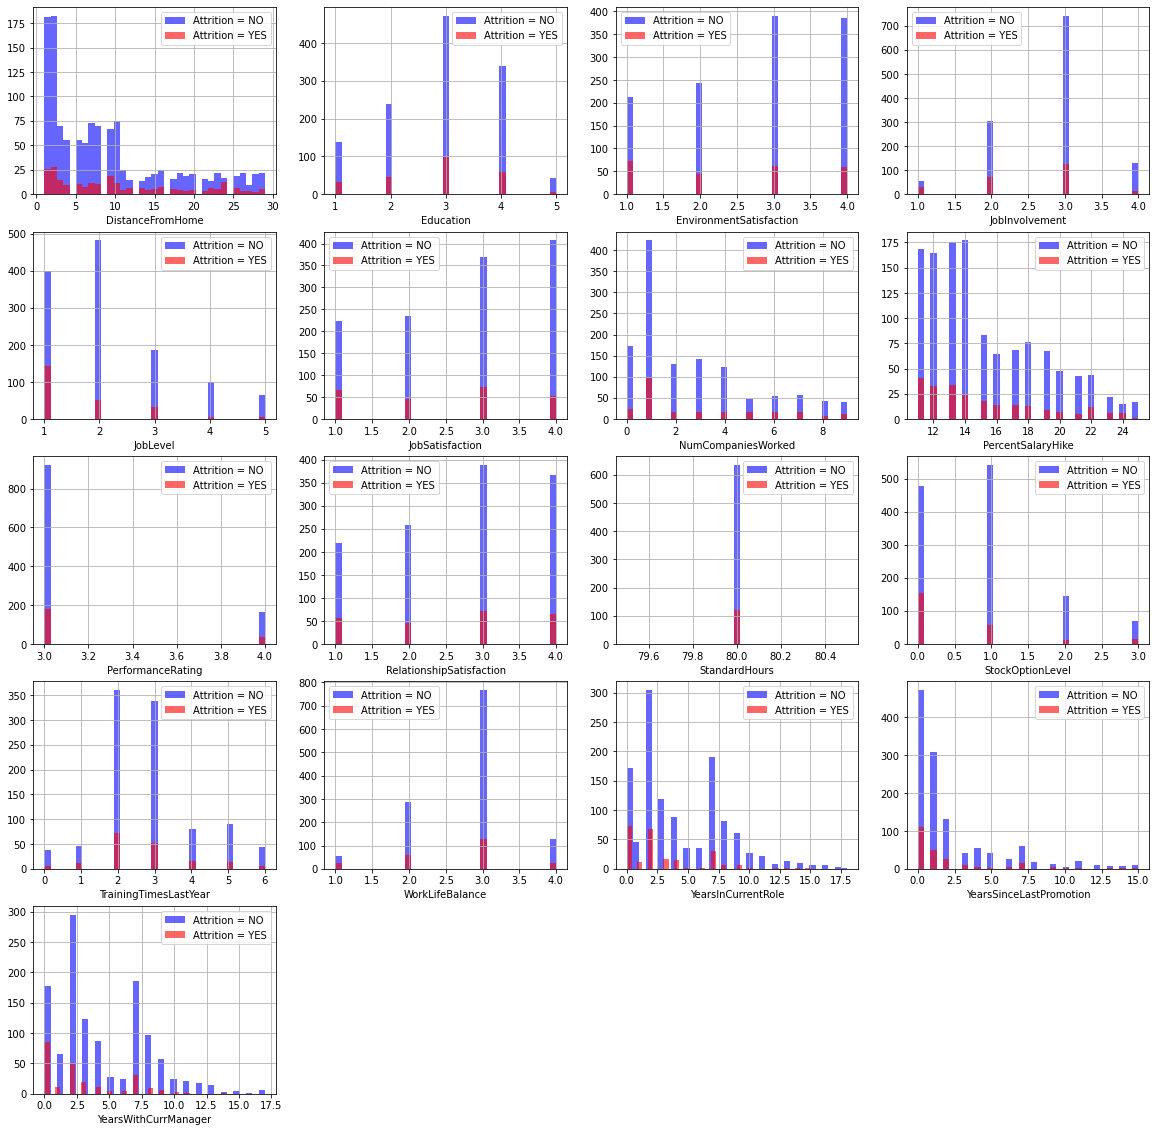

In [30]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(5, 4, i)
    df1[df1["Attrition_numerical"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df1[df1["Attrition_numerical"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.

BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

In [31]:
categorical_df=df.select_dtypes(exclude=np.number)
categorical_cols=list(categorical_df.columns)
for n in categorical_cols:
    print(pd.crosstab(df['Attrition'],df[n],normalize='columns'))
    print("====================================")

Attrition   No  Yes
Attrition          
No         1.0  0.0
Yes        0.0  1.0
BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
No                 0.84058           0.834646       0.850053
Yes                0.15942           0.165354       0.149947
Department  Human Resources  Research & Development     Sales
Attrition                                                    
No                 0.809524                0.861602  0.793722
Yes                0.190476                0.138398  0.206278
EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
No                     0.740741       0.853135   0.779874  0.864224  0.865854   
Yes                    0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
No                      0.757576 

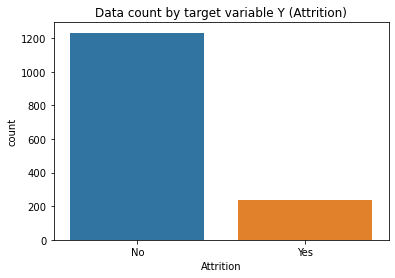

In [32]:
# Checking data imbalance
sb.countplot(x=df['Attrition'])
plt.title('Data count by target variable Y (Attrition)')
plt.show()

<ipython-input-34-22d3ebfacdd3>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


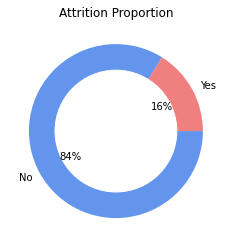

In [34]:
#RESULTS: Imbalanced data: 16% have left job, 84% have stayed

Y_count = len(df[df['Attrition'] == 'Yes'])
N_count = len(df[df['Attrition'] == 'No'])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

when computing the correlation, only attributes where we compute statistical tools

bar chart for categorical
histogram cont numer
more groups, find median, the fillNa will be more accurate

In [35]:
# Overview of summary (Attrition V.S. Non-Attrition)
attrition_Summary = df.groupby('Attrition')
attrition_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.173460,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6550.136727,...,2.733982,80.0,0.845093,11.862936,2.827173,2.781022,6.876385,4.484185,2.234388,4.367397
Yes,36.812808,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,6542.409574,...,2.599156,80.0,0.527426,8.244726,2.717514,2.658228,7.291480,2.902954,1.945148,2.852321


# 1.3 Assessing data quality (missing values, outliers)

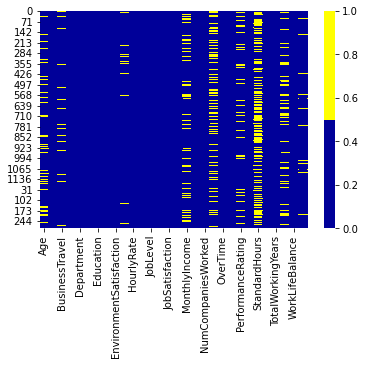

In [36]:
#Visualize the missing data patterns
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sb.heatmap(df[cols].isnull(), cmap=sb.color_palette(colours))

In [37]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}\t - {}%'.format(col, round(pct_missing*100)))

Age	 - 14.0%
Attrition	 - 0.0%
BusinessTravel	 - 9.0%
DailyRate	 - 0.0%
Department	 - 0.0%
DistanceFromHome	 - 0.0%
Education	 - 0.0%
EducationField	 - 0.0%
EnvironmentSatisfaction	 - 0.0%
Gender	 - 5.0%
HourlyRate	 - 0.0%
JobInvolvement	 - 0.0%
JobLevel	 - 0.0%
JobRole	 - 0.0%
JobSatisfaction	 - 0.0%
MaritalStatus	 - 0.0%
MonthlyIncome	 - 19.0%
MonthlyRate	 - 0.0%
NumCompaniesWorked	 - 0.0%
Over18	 - 32.0%
OverTime	 - 0.0%
PercentSalaryHike	 - 0.0%
PerformanceRating	 - 12.0%
RelationshipSatisfaction	 - 0.0%
StandardHours	 - 49.0%
StockOptionLevel	 - 0.0%
TotalWorkingYears	 - 0.0%
TrainingTimesLastYear	 - 20.0%
WorkLifeBalance	 - 0.0%
YearsAtCompany	 - 5.0%
YearsInCurrentRole	 - 0.0%
YearsSinceLastPromotion	 - 0.0%
YearsWithCurrManager	 - 0.0%


In [41]:
df1['PerformanceRating'].value_counts()

3.0    1098
4.0     200
Name: PerformanceRating, dtype: int64

In [42]:
df1['PerformanceRating'] = df1['PerformanceRating'].fillna(df1['PerformanceRating'].mode()[0])

In [43]:
# Find the mode and how many empty values are in Gender
print('The gender that appears the most is: ', df1['Gender'].mode()[0])
df1['Gender'].isnull().value_counts()

The gender that appears the most is:  Male


False    1395
True       75
Name: Gender, dtype: int64

In [44]:
# Fill the missing gender with the mode (Male)
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])

In [ ]:
# Encoding categorical variables
df1=pd.get_dummies(df, columns=None)
df1.head()

In [ ]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = df.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [ ]:
Age_YAC_NCW = df[['Age','YearsAtCompany','NumCompaniesWorked','Attrition']]
#Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
#AYN_melt.head()

In [ ]:
g = sb.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sb.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

In [ ]:
# Get column names
column_names = df.columns
print(column_names)

# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


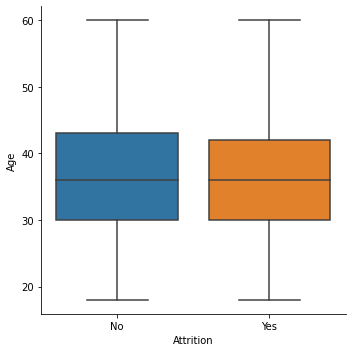

In [45]:
sb.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


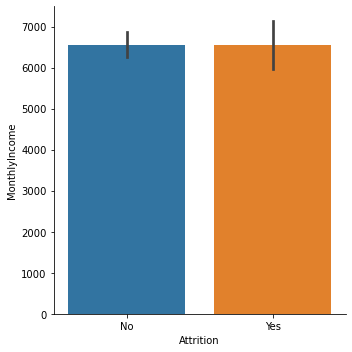

In [46]:
sb.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

In [47]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True, normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [48]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True, normalize='index') 

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


In [49]:
pd.crosstab(columns=[df.Attrition],index=[df.MaritalStatus],margins=True, normalize='index') 

Attrition,No,Yes
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319
All,0.838776,0.161224


In [50]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True, normalize='index') 

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [51]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index')

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


# 1.4 Variable Transformation

In [52]:
#Label Encoder from the scikit library to encode all the categorical features.
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature].astype(str))
    print(le.classes_)
    
cat_df=df.select_dtypes(include='object')
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely' 'nan']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male' 'nan']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y' 'nan']
['No' 'Yes']


# 1.5 Pairwise correlations and eventual elimination of redundant variables

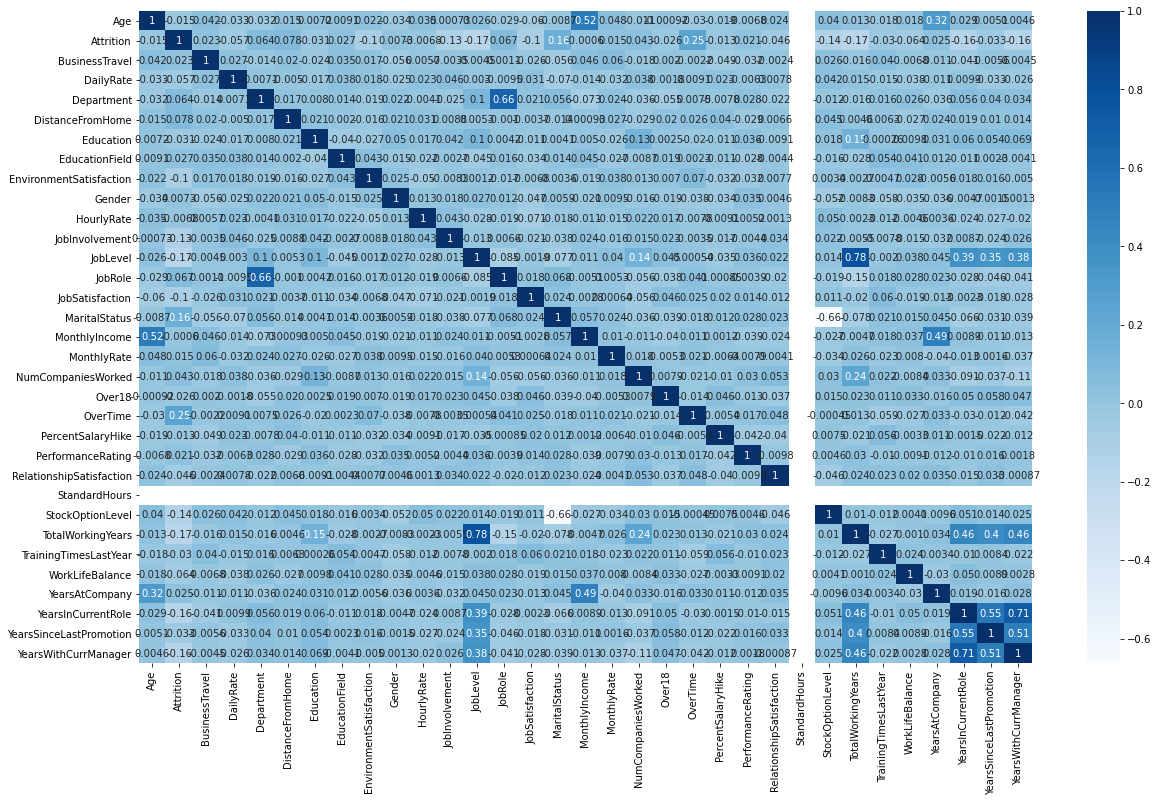

In [53]:
#Correlation Matrix
corr = df.corr()

corr_matrix = df.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix,vmax=1.0,cmap='Blues', annot=True)

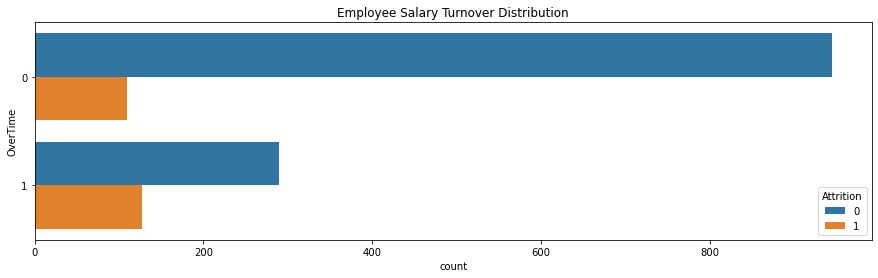

In [54]:
f, ax = plt.subplots(figsize=(15, 4))
sb.countplot(y="OverTime", hue='Attrition', data=df).set_title('Employee Salary Turnover Distribution');

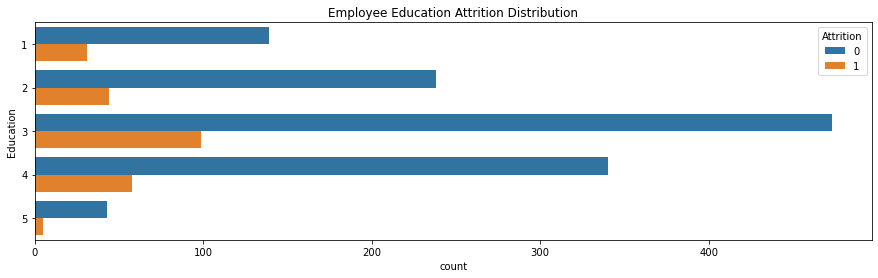

In [55]:
f, ax = plt.subplots(figsize=(15, 4))
sb.countplot(y="Education", hue='Attrition', data=df).set_title('Employee Education Attrition Distribution');

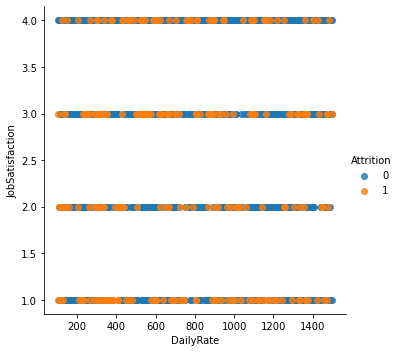

In [56]:
sb.lmplot(y='JobSatisfaction', x='DailyRate', data=df,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage